## **Name:** Affan Zulfiqar

---

## **Reg No:** B22F0144AI050
---
## **Course:** ANN (7)
---
## **Section:** AI22F-Blue


**Importing Libraries:**

In [13]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax, Nadam, Ftrl


**Dataset Loading & Preprocessing of dataset**

The MNIST dataset is loaded and preprocessed by normalizing pixel values to the range [0,1] for better model convergence. Images are flattened into 784-dimensional vectors, and labels are converted to one-hot encoding to match the categorical classification output.

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images (28x28 → 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Convert labels to categorical (One-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

**Complex ANN Model**

A complex ANN model with multiple dense layers, batch normalization, and dropout to improve learning efficiency and prevent overfitting. Leaky ReLU activation enhances gradient flow, while softmax in the output layer ensures multi-class classification.

In [ ]:
def complex_ann():
    model = keras.Sequential([
        keras.layers.Dense(2048, input_shape=(784,)),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(alpha=0.1),
        keras.layers.Dropout(0.4),

        keras.layers.Dense(1024),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(alpha=0.1),
        keras.layers.Dropout(0.4),

        keras.layers.Dense(512),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(alpha=0.1),
        keras.layers.Dropout(0.3),

        keras.layers.Dense(256),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(alpha=0.1),
        keras.layers.Dropout(0.3),

        keras.layers.Dense(128),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(alpha=0.1),
        keras.layers.Dropout(0.2),

        keras.layers.Dense(64),
        keras.layers.BatchNormalization(),
        keras.layers.LeakyReLU(alpha=0.1),

        keras.layers.Dense(10, activation='softmax')  # Output layer
    ])
    return model

**Multiple optimizers**

A variety of optimizers are used to evaluate their impact on model performance.

In [ ]:
# Define multiple optimizers
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "Momentum_SGD": SGD(learning_rate=0.01, momentum=0.9),
    "Adagrad": Adagrad(learning_rate=0.01),
    "RMSprop": RMSprop(learning_rate=0.001),
    "Adam": Adam(learning_rate=0.001),
    "Adamax": Adamax(learning_rate=0.002),
    "Nadam": Nadam(learning_rate=0.002),
    "FTRL": Ftrl(learning_rate=0.005)
}

**Training Model:**

The model is trained using different optimizers over 5 epochs with a batch size of 64, and training performance is recorded. This allows a comparative analysis of how optimizers influence convergence, accuracy, and loss trends.

In [14]:
# Training configurations
batch_size = 64
epochs = 5

# Results dictionary
results = {}

for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer...")
    model = complex_ann()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=1)

    results[opt_name] = history.history




Training with SGD optimizer...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 103s 80ms/step - accuracy: 0.5479 - loss: 1.4221 - val_accuracy: 0.9173 - val_loss: 0.2957
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.8662 - loss: 0.4632 - val_accuracy: 0.9389 - val_loss: 0.2032
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.8955 - loss: 0.3520 - val_accuracy: 0.9471 - val_loss: 0.1677
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 81ms/step - accuracy: 0.9139 - loss: 0.2947 - val_accuracy: 0.9541 - val_loss: 0.1470
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.9187 - loss: 0.2716 - val_accuracy: 0.9585 - val_loss: 0.1328

Training with Momentum_SGD optimizer...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.7840 - loss: 0.6940 - val_accuracy: 0.9630 - val_loss: 0.1243
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.9378 - loss: 0.2078 - val_accuracy: 0.9720 - val_loss: 0.0911
Epoch 3/5
938/938 ━━━━━

**Performance comparison:**

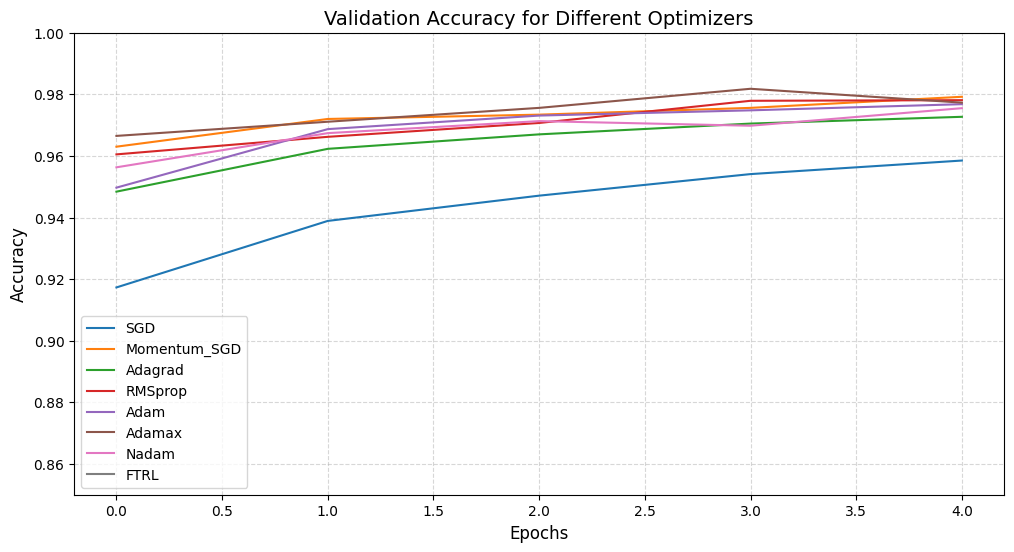

In [19]:
plt.figure(figsize=(12, 6))
for name, history in results.items():
    plt.plot(history['val_accuracy'], label=name)

plt.title("Validation Accuracy for Different Optimizers", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.85, 1.0)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

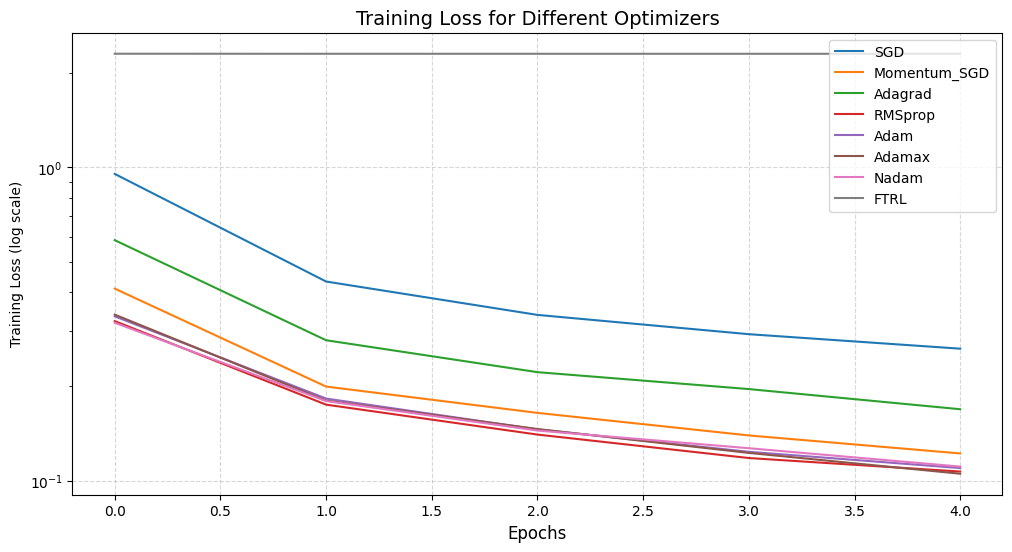

In [22]:
plt.figure(figsize=(12, 6))
for name, history in results.items():
    plt.plot(history['loss'], label=name)

plt.yscale("log")  # Log scale for better visibility
plt.title("Training Loss for Different Optimizers", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Training Loss (log scale)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

**Impact of Learning Rate on Optimizer Performance**

The learning rate controls how fast an optimizer updates model weights. High learning rates (e.g., 0.01) can lead to faster convergence but risk overshooting the optimal solution, causing instability. Lower learning rates (e.g., 0.001) lead to stable training but may slow convergence. Adaptive optimizers like Adam and RMSprop adjust learning rates dynamically, improving performance across different settings.

 **Effect of Batch Size on Training Convergence**

A smaller batch size (e.g., 32) results in noisier updates, providing better generalization but slower convergence. A larger batch size (e.g., 64 or 128) speeds up training by making smoother weight updates, but it may lead to overfitting or poor generalization. Optimizers like SGD benefit from smaller batch sizes, while Adam and RMSprop perform well with larger batches.

**Influence of Dropout & Batch Normalization on Optimizer Performance**

Dropout (0.3-0.4) improves generalization by randomly deactivating neurons, preventing overfitting. It forces optimizers to learn more robust features. However, excessive dropout may slow convergence for optimizers like SGD.
Batch Normalization stabilizes training by normalizing activations, enabling faster convergence, especially for high learning rates. It significantly improves the performance of SGD, Adam, and RMSprop by reducing internal covariate shifts.

**Conclusion:**

Learning rate, batch size, dropout, and batch normalization must be tuned together to achieve optimal performance for different optimizers.
